In [1]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
load_dir = './data/'
save_dir = './plots/'

tourist_files = dict()
for k in [3, 4,5, 6, 8, 10, 12, 15]:
    tourist_files[k] = 'tourist{}results.pck'.format(k)
local_files = dict()
for k in [4,5, 6, 8, 10, 12, 15]:
    local_files[k] = 'local{}results.pck'.format(k)
combined_files = dict()
for k in [3, 4, 5,6, 8, 10]:
    combined_files[k] = 'combo{}results.pck'.format(k)

In [11]:
def err_plot(K, train_err, test_err, savename='err_plot'):
    """
    Plot the trainint and testing error and save in the given directory
    """
    iters = np.shape(train_err)[0]
    print(iters)
    plt.figure(figsize=(10, 10))
    plt.plot(np.arange(iters), train_err, label='training')
    plt.plot(np.arange(iters), test_err, label='testing')
    plt.title('Errors for K = {}'.format(K), fontsize=20)
    plt.legend()
    plt.xlabel('iteration', fontsize=16)
    plt.ylabel('Root Mean Squared Error', fontsize=16)
    plt.savefig('{}_{}.png'.format(savename, K))
    
def plot_all_errors(file_dict, all_train, all_test, title='All Errors', savename='AllErrors.eps'):
    """
    Plot all errors on a single figure (using subplots). Assumes that the file_dict is of length 6
    (i.e. will only plot the first 6 entries of file dict). If more are desired then edit subplot layout
    """
    fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(14, 7))
    i = 0
    for r, row_ax in enumerate(axes):
        for c, ax in enumerate(row_ax):
            k = list(file_dict.keys())[i]
            iters = all_train[str(k)].shape[0]
            ax.plot(np.arange(iters), all_train[str(k)], label='train')
            ax.plot(np.arange(iters), all_test[str(k)], label='test')
            if r > 0:
                ax.set_xlabel('iteration', fontsize=16)
            if c == 0:
                ax.set_ylabel('error', fontsize=16)
            ax.set_title('K = '+str(k), fontsize=16)
            ax.set_xlim([0, iters-1])
            ax.set_ylim([0, 3.5])
            i += 1
    fig.subplots_adjust(right=0.9)
    fig.subplots_adjust(top=.9)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='lower left', borderaxespad=0., fontsize=16, frameon=False)
    fig.suptitle(title, fontsize=20)
    plt.savefig(savename)
    

def plot_all_diffs(file_dict, all_lam, all_psi, title='All Diffs', savename='AllDiffs.eps'):
    """
    Plot all diffs on a single figure (using subplots). Assumes that the file_dict is of length 6
    (i.e. will only plot the first 6 entries of file dict). If more are desired then edit subplot layout
    """
    fig, axes = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(14, 7))
    i = 0
    axs = dict()
    for r, row_ax in enumerate(axes):
        for c, ax in enumerate(row_ax):
            axs[(r, c)] = ax
            k = list(file_dict.keys())[i]
            iters = all_train[str(k)].shape[0]
            ax.plot(np.arange(iters), all_lam[str(k)], 'g', label='Lambda')
            ax2 = ax.twinx()
            ax2.plot(np.arange(iters), all_psi[str(k)], 'r', label='Psi')
            if r > 0:
                ax.set_xlabel('iteration', fontsize=16)
            if c == 0:
                ax.set_ylabel('Lam difference', fontsize=16, color='g')
                ax.tick_params('y', colors='g')
            else:
                ax.get_yaxis().set_visible(False)
            if c == 2:
                ax2.set_ylabel('Psi difference', fontsize=16, color='r')
                ax2.tick_params('y', colors='r')
            else:
                ax2.get_yaxis().set_visible(False)
            ax.set_title('K = '+str(k), fontsize=16)
            ax.set_xlim([0, iters-1])
            ax.set_ylim([0, 300])
            ax2.set_ylim([0, 3])
#             ax2.set_ylabel('sin', color='r')
#         ax2.tick_params('y', colors='r')
            i += 1
    fig.subplots_adjust(right=0.9)
    fig.subplots_adjust(top=.9)
    ax.legend(bbox_to_anchor=(1.1, 1.1), loc='lower left', borderaxespad=0., fontsize=16, frameon=False)
    ax2.legend(bbox_to_anchor=(1.1, .9), loc='lower left', borderaxespad=0., fontsize=16, frameon=False)
    fig.suptitle(title, fontsize=20)
    plt.savefig(savename)    

def load_data(file_dict, plot=False, savename='err_plot'):
    """
    Loads the data stored in file dict (which should each be the results of a simulation run) and stores it in several
    Pandas data frames:
        - all_train: training errors at each iteration
        - all_test: testing errors at each iteration
        - all_lam: norm of difference between lambda at this iteration and previous iteration for each iteration
        - all_psi: norm of difference between psi at this iteration and previous iteration for each iteration
    
    Set plot=True to plot and dave each run individually
    """
    all_train = pd.DataFrame()
    all_test = pd.DataFrame()
    all_lam = pd.DataFrame()
    all_psi = pd.DataFrame()
    for tf in file_dict:
        results = pickle.load(open(load_dir + file_dict[tf], 'rb')) 
        iters = results['train_err'].shape[0]
        new_train = {str(tf):pd.Series(results['train_err'])}
        new_test = {str(tf):pd.Series(results['test_err'])}
        new_lam = {str(tf):pd.Series(results['lam_diff'])}
        new_psi = {str(tf):pd.Series(results['psi_diff'])}
        all_train = all_train.assign(**new_train)
        all_test = all_test.assign(**new_test)
        all_lam = all_lam.assign(**new_lam)
        all_psi = all_psi.assign(**new_psi)
        if plot:
            err_plot(tf, results['train_err'], results['test_err'], savename)
    return all_train, all_test, all_lam, all_psi

def plot_k_sweep(file_dict, all_train, all_test, title='K sweep', savename='ksweep.eps'):
    """
    Plots the final training and testing errors for each k value in the file dict
    """
    k_vals = list(file_dict.keys())
    final_test = [all_test[str(k)].iloc[-1] for k in k_vals]
    final_train = [all_train[str(k)].iloc[-1] for k in k_vals]
    plt.figure(figsize=(10, 10))
    plt.plot(k_vals, final_train, label='train')
    plt.plot(k_vals, final_test, label='test')
    plt.legend(fontsize=14)
    plt.title(title, fontsize=16)
    plt.xlabel('K', fontsize=14)
    plt.ylabel('Error', fontsize=14)
    plt.savefig(savename)

In [105]:
# results = pickle.load(open(load_dir + tourist_files[4], 'rb'))
# print(results.keys())

dict_keys(['x', 'Ytest', 'Ytrain', 'Lam', 'x_test', 'Lam_test', 'lam_diff', 'psi_diff', 'train_err', 'test_err'])


# Tourist Plots

          3         4         5         6         8        10        12  \
0  1.550196  1.782247  1.565782  1.590117  0.703142  0.464946  0.487451   
1  1.683311  2.385872  1.978729  2.073758  0.666358  0.317777  0.447528   
2  1.711901  2.459903  2.059376  2.163222  0.649747  0.316970  0.429707   
3  1.651249  2.295583  1.859347  1.995306  0.630575  0.316070  0.414796   
4  1.533934  2.002721  1.565925  1.720194  0.607195  0.313598  0.400562   

         15  
0  0.260280  
1  0.203798  
2  0.177418  
3  0.148433  
4  0.117861  


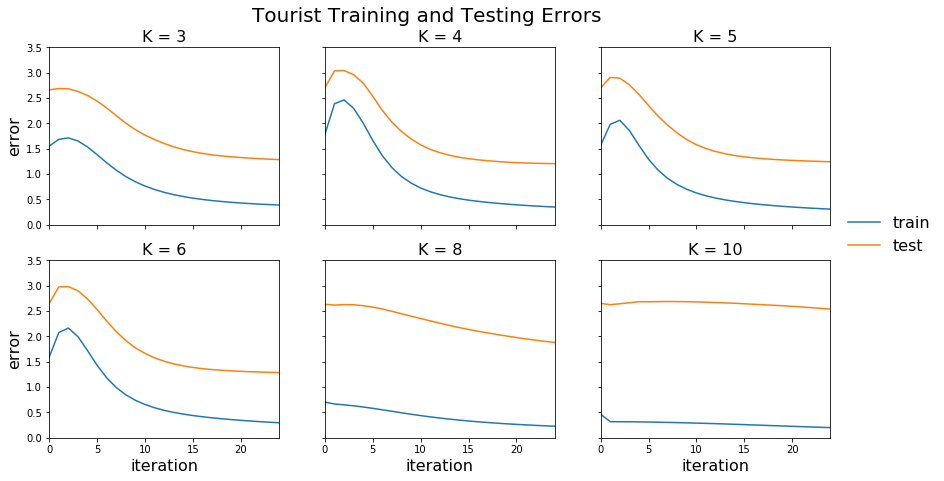

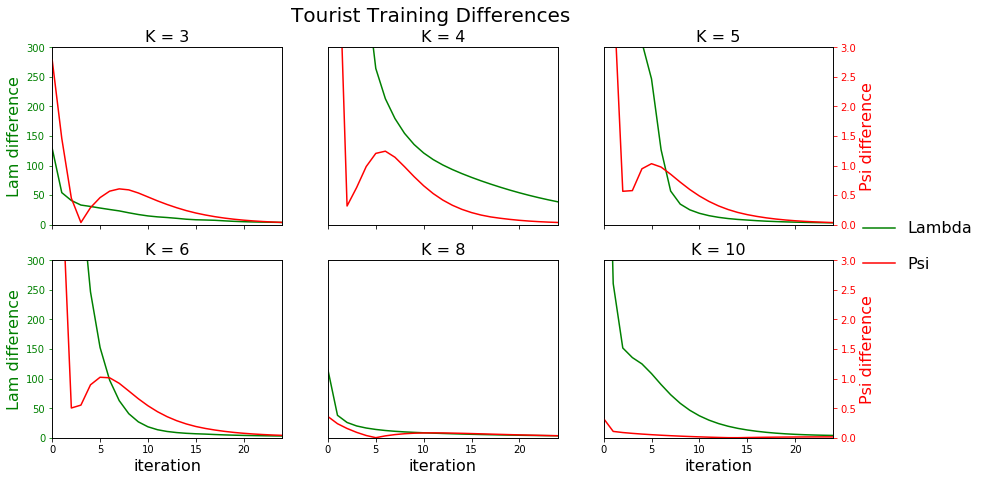

In [13]:
all_train, all_test, all_lam, all_psi = load_data(tourist_files, plot=False, savename=save_dir+'/individual/tourist')
print(all_train.head())
plot_all_errors(tourist_files, all_train, all_test, title='Tourist Training and Testing Errors',
                savename=save_dir+'allerror_tourist.png')
plot_all_diffs(tourist_files, all_lam, all_psi, title='Tourist Training Differences', 
               savename=save_dir+'diffs_tourist.eps')  
# plot_k_sweep(tourist_files, all_train, all_test, title='K Sweep for Tourists', savename=save_dir+'ksweep_tourist.png')

# Local Plots

          4         5         6         8        10        12        15
0  1.947218  1.848786  2.677358  2.657771  2.327978  1.157935  2.485546
1  2.092890  2.003603  3.045758  3.023196  2.671371  1.217842  2.866197
2  1.982077  1.989573  2.869212  2.685993  2.360045  1.211060  2.406505
3  1.525653  1.724731  2.071993  1.828708  1.647081  1.120269  1.614639
4  1.135186  1.369410  1.420497  1.291106  1.195027  0.989648  1.187780


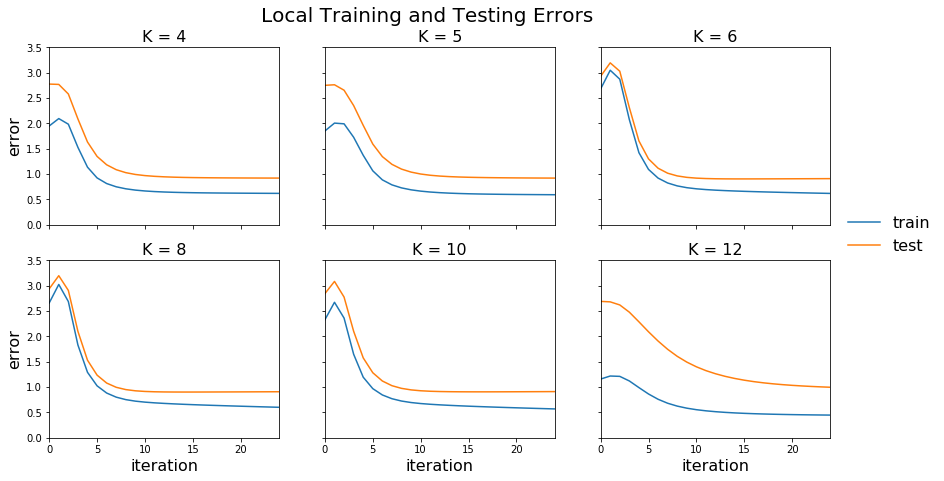

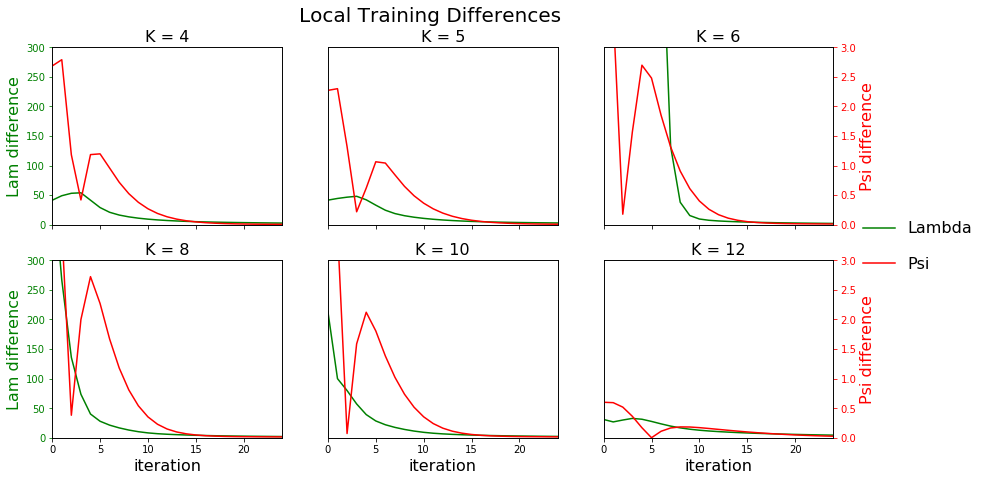

In [14]:
all_train, all_test, all_lam, all_psi = load_data(local_files, plot=False, savename=save_dir+'/individual/local')
print(all_train.head())
plot_all_errors(local_files, all_train, all_test, title='Local Training and Testing Errors',
                savename=save_dir+'allerror_local.png')
plot_all_diffs(local_files, all_lam, all_psi, title='Local Training Differences', 
               savename=save_dir+'diffs_local.eps')  
# plot_k_sweep(local_files, all_train, all_test, title='K Sweep for Local', savename=save_dir+'ksweep_local.png')

# Combined Plots

          3         4         5         6         8        10
0  2.825231  2.015027  2.242210  2.734349  2.576861  2.306461
1  3.137833  2.246350  2.604722  3.083671  2.964360  2.678184
2  3.136842  2.339316  2.572352  3.025240  2.789479  2.560511
3  2.927289  2.171864  1.897636  2.518251  2.001848  1.851516
4  2.292759  1.742990  1.314475  1.754381  1.389768  1.303425


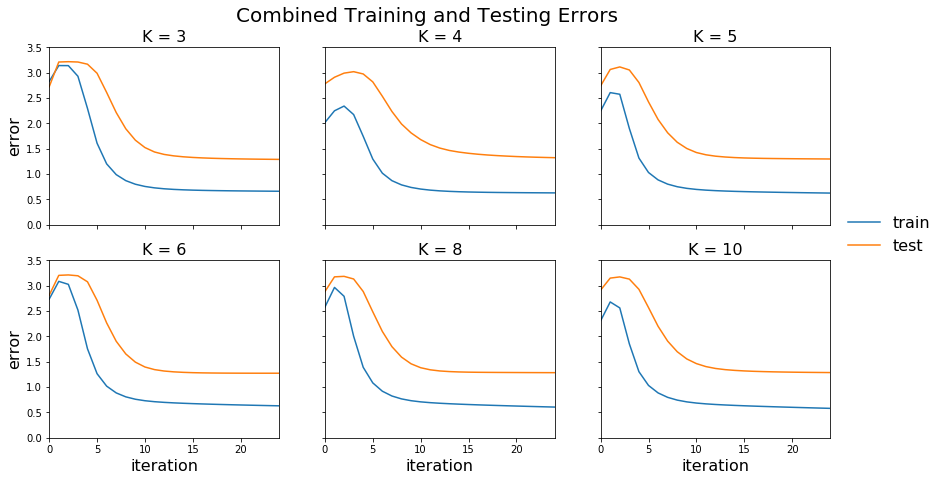

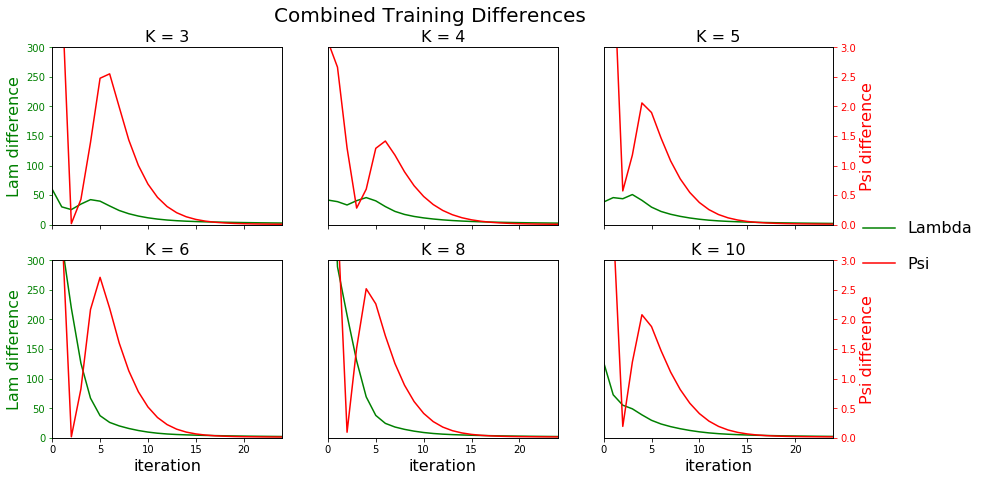

In [15]:
all_train, all_test, all_lam, all_psi = load_data(combined_files, plot=False, savename=save_dir+'/individual/combo')
print(all_train.head())
plot_all_errors(combined_files, all_train, all_test, title='Combined Training and Testing Errors',
                savename=save_dir+'allerror_combined.png')
plot_all_diffs(combined_files, all_lam, all_psi, title='Combined Training Differences', 
               savename=save_dir+'diffs_combined.eps')  
# plot_k_sweep(combined_files, all_train, all_test, title='K Sweep for Combined', 
#              savename=save_dir + 'ksweep_combined.png')